Задание:
Любой текст.

Высокая цель: уменшить размерность векторного представления слов текстуальных данных. Построить граифики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 
5. Сколько компонент нужно оставить что бы сохранить 90% информации. 
6. Попробовать восстановить пару исходных слов. 

1. Загружаем текстовый файл:

In [534]:
%reset 
file_name = 'book.txt' # file with text
# file_name = 'txt.txt' # file with text
try:
    f = open(file_name,"r") # open file for reading
    text = f.read()         # reading file 
    f.close()               # closing file
    print('Read successfully')
except:
    print('Error reading file!')

Nothing done.
Read successfully


2. Обработка текстовых данных.

Переводим текст в нижний регистр.

In [535]:
# to lower case:
text = text.lower()
print(text)

friendship
by ralph waldo emerson
1. we have a great deal more kindness than is ever spoken. barring all
the selfishness that chills like east winds the world, the whole human
family is bathed with an element of love like a fine ether. how many
persons we meet in houses, whom we scarcely speak to, whom yet we
honor, and who honor us! how many we see in the street, or sit with in
church, whom, though silently, we warmly rejoice to be with! read the
language of these wandering eyebeams. the heart knoweth.
2. the effect of the indulgence of this human affection is a certain
cordial exhilaration. in poetry, and in common speech, the emotions of
benevolence and complacency which are felt toward others, are likened
to the material effects of fire; so swift, or much more swift, more
active, more cheering are these fine inward irradiations. from the
highest degree of passionate love, to the lowest degree of good will,
they make the sweetness of life.
3. our intellectual and active powers incre

Убираем в тексте, полученном в пункте 2, знаки препинания и шире - все неалфавитные знаки, в том числе цифры, заменив их пробелами.

In [536]:
# replace non-alphanumeric signs by whitespaces:
text_no_signs = "".join([c if c.isalpha() else " " for c in text])

Разбиваем текст на слова процедурой split, считая пробелы разделителями.

In [537]:
word_list = text_no_signs.split() # split text into words and put to the list
print(len(word_list))

5960


Из полученного списка слов убираем все стоп-слова. Получаем тем самым список значащих слов текста.

Для этого надо вначале создать список стоп-слов
(источник: https://github.com/explosion/spaCy/blob/master/spacy/lang/en/stop_words.py)

In [538]:
STOP_WORDS = set(
    """
a about above across after afterwards again against all almost alone along
already also although always am among amongst amount an and another any anyhow
anyone anything anyway anywhere are around as at

back be became because become becomes becoming been before beforehand behind
being below beside besides between beyond both bottom but by

call can cannot ca could

did do does doing done down due during

each eight either eleven else elsewhere empty enough even ever every
everyone everything everywhere except

few fifteen fifty first five for former formerly forty four from front full
further

get give go

had has have he hence her here hereafter hereby herein hereupon hers herself
him himself his how however hundred

i if in indeed into is it its itself

keep

last latter latterly least less

just

made make many may me meanwhile might mine more moreover most mostly move much
must my myself

name namely neither never nevertheless next nine no nobody none noone nor not
nothing now nowhere

of off often on once one only onto or other others otherwise our ours ourselves
out over own

part per perhaps please put

quite

rather re really regarding

s same say see seem seemed seeming seems serious several she should show side
since six sixty so some somehow someone something sometime sometimes somewhere
still such 

take ten than that the their them themselves then thence there thereafter
thereby therefore therein thereupon these they third this those though three
through throughout thru thus to together too top toward towards twelve twenty
two

under until up unless upon us used using

various very very via was we well were what whatever when whence whenever where
whereafter whereas whereby wherein whereupon wherever whether which while
whither who whoever whole whom whose why will with within without would

yet you your yours yourself yourselves
""".split()
)

contractions = ["n't", "nt", "'d", "d", "'ll", "ll", "'m", "m", "'re", "re", "'s", "s", "'ve", "ve"]
STOP_WORDS.update(contractions)

for apostrophe in ["‘", "’"]:
    for stopword in contractions:
        STOP_WORDS.add(stopword.replace("'", apostrophe))

print(STOP_WORDS)

{'everywhere', 'our', 'be', 'part', 'me', 'which', 'with', 'too', 'become', 'has', 'my', 'every', 'empty', 'once', 'otherwise', 'unless', 'beforehand', 'whoever', 'formerly', '‘ll', 'becomes', 'more', 'so', 'anything', 'himself', 'of', 'should', 'twenty', 'us', 'per', 'may', "'ll", 'alone', 'along', 'not', 'via', 'most', 'down', 'throughout', 'always', 'among', 'afterwards', 'a', 'is', 'even', 'whatever', 'nor', 'what', 'yourselves', 'quite', 'you', 'them', '’ll', 'becoming', 'sixty', 'd', 'would', 'amount', 'ever', 'except', 'never', 'if', 'all', 'take', 'get', 'were', 'against', 'themselves', 'made', 'your', 'meanwhile', 'less', 'yet', '‘m', 'ten', 'without', 'mostly', 'top', 'name', 'somewhere', 'upon', 'very', 'nt', '’s', '‘s', 'someone', 'being', 'beyond', 'last', 'side', 'nine', 'full', 'before', 'elsewhere', 'besides', 'about', 'seeming', "'re", 'give', 'much', 're', 'other', 'are', 'any', 'many', 'below', 'twelve', 'under', 'hers', 'seemed', 'that', '’m', 'four', 'however', 'bo

Убираем из списка слова, если они входят в список стоп-слов.
Затем убираем дубли, преобразовав список во множество и обратно в список.

In [539]:
word_list_new = list()
for aword in word_list:
    if aword not in STOP_WORDS:
        word_list_new.append(aword)

word_list = word_list_new
word_list = list(set(word_list))
print(len(word_list))

1429


3. Работа с моделью spacy

In [540]:
import spacy

In [541]:
# Downloading language model spacy en_core_web_md
# running this once to download language model
# then quoting this: 
# !python -m spacy download en_core_web_md

Создаем документ spacy из нашего списка слов.

In [542]:
# Loading the medium-sized spacy English model 
nlp = spacy.load('en_core_web_md')
# Loading the large-sized spacy English model (to embrace all the terms in the text)
# nlp = spacy.load('en_core_web_lg')
# Creating a SpaCy document. Since the argument has to be a string, 
# we have to make a string from the prepared word set first:
doc_spacy = nlp(" ".join([aword for aword in word_list]))

Векторизация набора слов с помощью spacy

Собственно, уже после создания документа spacy каждое слово текста, переданного в этот документ, получает свой вектор.
Можно вывести на экран и полюбоваться многомерным вектором.

In [543]:
# Get vectors for individual tokens
for token in doc_spacy:
    print(f"Token: {token.text}, Vector: {token.vector}")

Token: eyes, Vector: [-6.0781e-01 -4.4257e-01 -1.8828e-01  2.9884e-01  2.1304e-01 -2.5168e-01
 -7.6623e-01  2.6116e-01 -1.0419e-01  1.0848e+00  4.9701e-02  1.4150e-01
 -1.2962e-01 -1.1365e+00 -1.9173e-01  2.1305e-01 -1.8797e-01 -1.7092e-01
  1.6654e-01  2.2673e-01 -4.7394e-02 -2.6010e-01 -2.7572e-01 -2.1725e-01
  3.1841e-01 -5.2059e-01 -9.1579e-02  4.2556e-02  2.0414e-01 -2.4548e-01
 -3.5978e-01 -9.4397e-04  4.2983e-01  1.9314e-01 -7.9484e-03  6.3555e-02
  1.4315e-01  2.1643e-01 -6.2746e-01 -9.6293e-02  5.4892e-01 -5.1673e-01
  3.0641e-01  2.7976e-01 -1.8376e-01 -1.5269e-01  3.3147e-01  2.8068e-01
  3.1637e-01 -1.0341e-01 -4.8387e-01 -3.1386e-01 -6.3209e-01 -3.4888e-01
 -3.8300e-01  1.7539e-01 -6.5172e-01  4.8900e-01  2.3799e-02 -2.7721e-01
 -1.7510e-01 -1.7014e-01 -1.3489e-01 -3.3716e-01 -2.1296e-01 -3.5252e-01
 -3.7136e-01 -3.3764e-01 -3.4496e-01 -1.4089e-02  3.6633e-01 -1.4717e-01
 -2.1631e-01  5.4391e-02  5.7512e-02 -1.0979e-01 -6.1448e-01  2.1805e-01
  3.2560e-01 -1.0519e-01 -3.63

Размерность вектора:

In [544]:
print(token.vector.shape)

(300,)


Видим, какая большая размерность у каждого вектора - 300 компонент.

Внесем все вектора нашего текста в таблицу numpy, чтобы можно было затем применять PCA

Все "векторизованные" слова внесем в отдельный список words_vectorized, так что каждому номеру вектора в таблице vector_array точно соответствует слово в списке words_vectorized с тем же номером

In [545]:
import numpy as np
tmp = [token.vector for token in doc_spacy if token.has_vector]
words_vectorized = [token.text for token in doc_spacy if token.has_vector]

In [546]:
print(token.vector.shape)
vector_array = np.array(tmp)
print(vector_array.shape)
initial_vector_length = token.vector.shape[0]

(300,)
(1399, 300)


Опциональная предварительная подготовка полученного датасета - масштабирование. 

Будет интересно проверить, повлияет ли масштабирование на полученные результаты.
В хемометрике считается, что метод РСА требует предварительной подготовки, а именно центрирования и нормирования векторов данных.
А вот в описании метода PCA в хелпах к библиотеке scikit-learn сказано иначе: "The input data is centered but not scaled for each feature before applying the SVD."
Вот и посмотрим, что получится, если применять/не применять масштабирование.


In [547]:
# preliminary scaling:
"""from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(vector_array)
"""
# no scaling:
X = vector_array 

Понижение размерности датасета с помощью PCA.

In [548]:
from sklearn.decomposition import PCA

Для примера возьмем число главных компонент, равное 2, и проверим объясненную дисперсию.

In [549]:
pca = PCA(n_components = 2)
pca.fit(X)
PCA(n_components = 2)
print(pca.explained_variance_ratio_)
print(f'Total explained variance: {100 * sum(pca.explained_variance_ratio_):.2f}%')

[0.07064787 0.05377804]
Total explained variance: 12.44%


Две главных компоненты объясняют всего 9% дисперсии для масштабированных данных и 12% для не масштабированных данных.

Далее рассчитаем и продемонстрируем зависимость объясненной дисперсии от числа использованных главных компонент:

In [550]:
n_sp = 0
var_ratio = []
# two variables for searching number of components esuring 90% explained variance: 
previous_expl_disp_value = 0
current_expl_disp_value = 0
pca = PCA() # no argument PCA keeps all the components
pca.fit(X)
specified_d_value = 90 # value of explained dispersion we specify, in percents 
for i in range(initial_vector_length+1):
  current_expl_disp_value = np.sum(pca.explained_variance_ratio_[:i])
  var_ratio.append(current_expl_disp_value)
  if current_expl_disp_value >= specified_d_value / 100 and previous_expl_disp_value < specified_d_value / 100:
    n_sp = i
    print(f'Number of components ensuring {specified_d_value}% explained dispersion: {n_sp}')
  previous_expl_disp_value = current_expl_disp_value

Number of components ensuring 90% explained dispersion: 125


Визуализация графика

Text(0.5, 1.0, 'N(components) vs. Explained Variance Ratio')

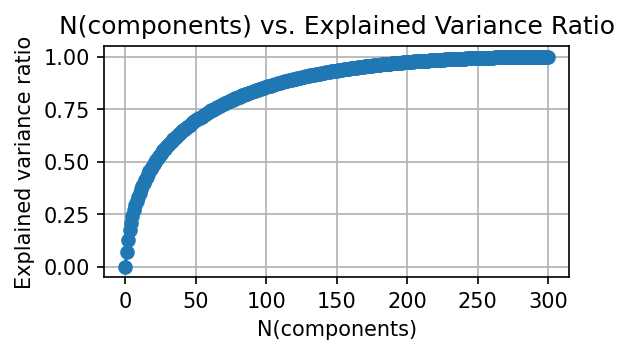

In [551]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,2), dpi = 150)
plt.grid()
plt.plot(var_ratio, marker = 'o')
plt.xlabel('N(components)')
plt.ylabel('Explained variance ratio')
plt.title('N(components) vs. Explained Variance Ratio')

Для случая, когда мы не масштабировали исходные данные, проведем прямое преобразование векторного пространства датасета с найденным числом главных компонент n_90 = 125, а затем обратное PCA - преобразование. 
И по восстановленным векторам попробуем восстановить несколько слов.

In [552]:
print(f'Quantity of principal components used: {n_sp} of total {initial_vector_length}')
pca_sp = PCA(n_components = n_sp) # 
X_sp = pca_sp.fit_transform(X)
X_recovered = pca_sp.inverse_transform(X_sp)


Quantity of principal components used: 125 of total 300


In [553]:
print(X_recovered.shape)
print(X.shape)

(1399, 300)
(1399, 300)


In [554]:
from scipy import spatial
tree = spatial.KDTree(X) # building tree for search of vector in initial table X
n = 0
N = 1399
print('Pairs of words before PCA and after reconstruction:')
for i in range(N):
    x_recovered = X_recovered[i,:]
    position = tree.query(x_recovered)[1] # position in the initial array X of the vector closest to the x_recovered
    print(f'{words_vectorized[i]} - {words_vectorized[position]}')
    # if the word is reconstructed exactly:
    if i == position: 
        n += 1
    else:
        print('!!! difference detected !!!')
print(f'Coincidence percent is: {n / N * 100:.2f}')

Pairs of words before PCA and after reconstruction:
eyes - eyes
commerce - commerce
baffled - baffled
diadems - diadems
individual - fill
!!! difference detected !!!
ill - unlike
!!! difference detected !!!
candidate - candidate
insulation - resistance
!!! difference detected !!!
sympathy - sentiment
!!! difference detected !!!
verily - verily
courage - courage
symbol - peace
!!! difference detected !!!
trifle - trifle
guild - guild
regards - particulars
!!! difference detected !!!
passion - enduring
!!! difference detected !!!
vitiates - vitiates
analysis - study
!!! difference detected !!!
chosen - commended
!!! difference detected !!!
fidelity - alliance
!!! difference detected !!!
pall - harbinger
!!! difference detected !!!
plain - perfection
!!! difference detected !!!
germination - germination
high - high
feel - crush
!!! difference detected !!!
existence - natures
!!! difference detected !!!
poverty - poverty
ralph - ralph
deify - exalt
!!! difference detected !!!
thanks - brot

Итак, нами был проделана векторизация англоязычного текста с помощью модели spacy, а затем с помощью метода PCA проведено уменьшение размерности.

Выводы:
В анализируемом англоязычном тексте первоначально было около 6000 слов. После удаления незначащих слов получилось чуть больше 1400 не повторяющихся слов. Векторизация с помощью языковой модели библиотеки spacy среднего размера (en_core_web_md) позволила присвоить векторное значение 1399 словам, каждый вектор имел 300 компонент (число триста обусловленно внутренней логикой работы библиотеки spacy с их моделью en_core_web_md).
Далее из полученных векторов была составлена таблица, представляющая собой датасет векторизованных слов исследуемого текста. С помощью метода PCA мы провели уменьшение размерности набора данных, а именно, преобразование датасета к новым координатным осям (главным компонентам) с попутным контролем общей объясненной дисперсии. 
Оказалось, что 90% дисперсии при использовании масштабирования данных датасета будет объяснено при использовании 132 главных компонент, то есть понижение размерности данных при такой дисперсии возможно более чем в два раза (с 300 до 132 главных компонент).
Когда масштабирование не применялось, для объяснения 90% дисперсии было достаточно 125 главных компонент, то есть их число поменялось незначительно.
Для случая объясненной дисперсии 90% мы провели восстановление вектора слова с помощью обратного преобразования методом главных компонент. Оказалось, что процент верно восстановленных слов оказывается в таком случае менее 50% (примерно 47%).